### Import the required libraries

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from uszipcode import SearchEngine
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn import metrics

In [232]:
# Settings to display all columns
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

### Load the Data

In [233]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
base_data = data.copy()

In [234]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [235]:
data.shape

(5000, 14)

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [237]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Exploratory Data Analysis

#### Looking at the distribution of the Target Variable. The number of people who has purchased the Personal loan is very less compared to the ones who hasnt purchased

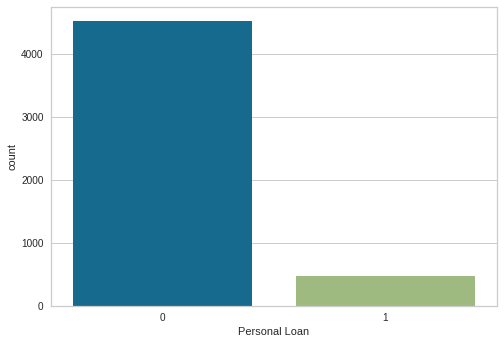

In [239]:
sns.countplot(data['Personal Loan'])

### EDA 1
 - Looking at the distribution of each of the variables to understand how the variables are distributed
 - Lot of variables having discrete values and they can be treated as categorical ones. Building a logic to account for variables less than 5 discrete values as categorical ones
 - Experience field is having negative values "-2" and "-3". For the purpose of this analysis, they are treated as manual errors and taking their absolute values
 - Experience and Age can be binned  by choosing approrpiate discrete values from the distribution
 - Mortgage feature is highly skewed and can be normalized to reduce the effect of single value
 - Income and CC Avg doesnt follow normal distribution and can be normalized by using one the standardization techniques

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


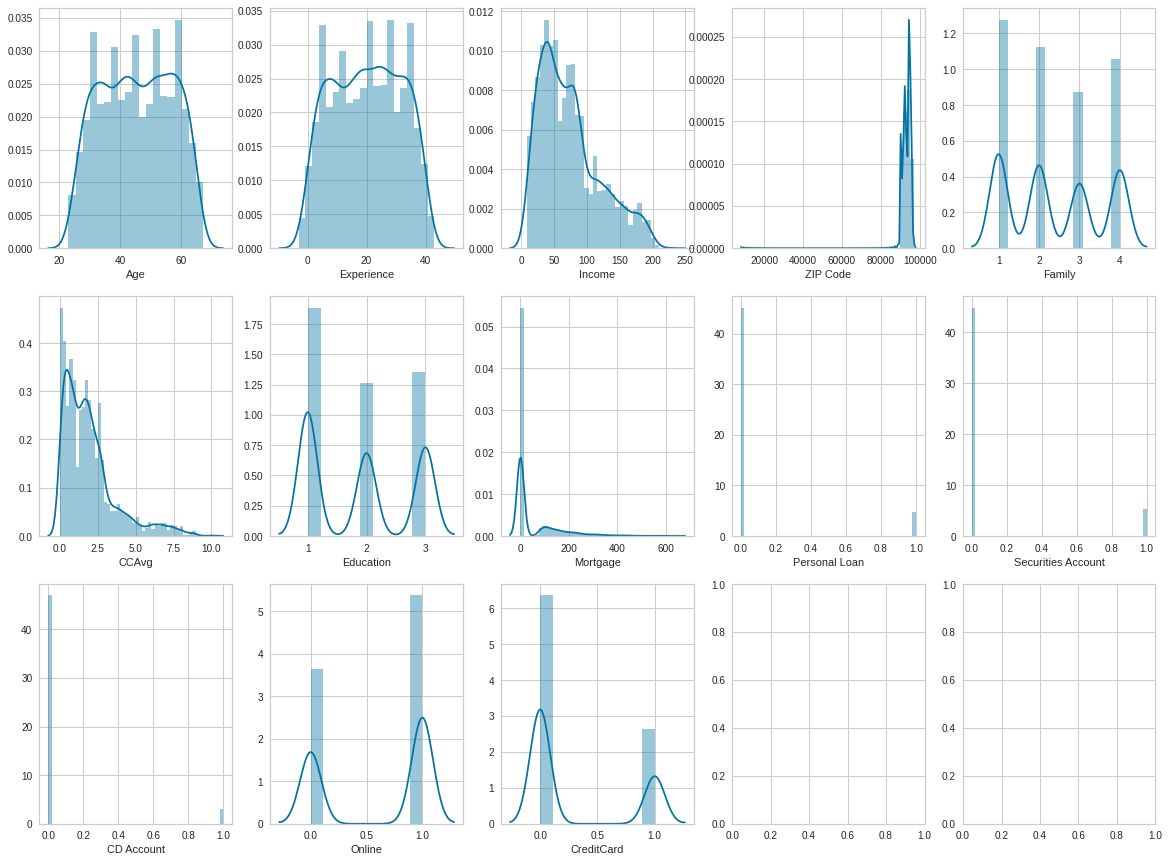

In [240]:
col_list=list(data.columns)
col_list.remove('ID')
fig, ax = plt.subplots(3, 5, figsize=(20, 15))
for variable, subplot in zip(col_list, ax.flatten()):
    sns.distplot(data[variable], ax=subplot)

From the distribution , it looks like some of the values for experience feature is showing as negative. Based on the number of negative values, deiciding to impute them with the absolute values

In [241]:
data[data['Experience']<0]['Experience'].unique()

array([-1, -2, -3])

In [242]:
len(data[data['Experience']<0]['Experience'])

52

In [243]:
data.loc[data['Experience']==-1,'Experience'] = 1
data.loc[data['Experience']==-2,'Experience'] = 2
data.loc[data['Experience']==-3,'Experience'] = 3

Creating a feature to keep track of columns to drop

In [244]:
cols_to_drop=[]
cols_to_drop.append('Age')
cols_to_drop.append('Experience')

Treating Age and Experience as the categorical variable by applying binning

In [245]:
print("Mininum and maximum age limit in the dataset is {} and {}".format(data['Age'].min(), data['Age'].max()))

Mininum and maximum age limit in the dataset is 23 and 67


In [246]:
age_bin_edges = [20,30,40,50,60,100]         
age_bin_labels = ['20-30','30-40','40-50','50-60','60-100']
data['age_bins'] = pd.cut(data['Age'], bins=age_bin_edges , labels=age_bin_labels)

In [247]:
print("Mininum and maximum Experience limit in the dataset is {} and {}".format(data['Experience'].min(), data['Experience'].max()))

Mininum and maximum Experience limit in the dataset is 0 and 43


In [248]:
exp_bin_edges = [0,10,20,30,40,60]         
exp_bin_labels = ['0-10', '10-20', '20-30','30-40','40-60']
data['exp_bins'] = pd.cut(data['Experience'], bins=exp_bin_edges , labels=exp_bin_labels)

### Zip Code
 - There are two options we can do with zip code, either omit them from the dataset since the other attributes in the dataset acts as proxy for the zip code or we can convert it into latitude and longitude and use it as a continous variable. Will try both the methods

In [249]:
search = SearchEngine(simple_zipcode=True)
def get_lat_lng(zipcode):
    zipData=search.by_zipcode(zipcode)
    return zipData.lat, zipData.lng

In [250]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'age_bins', 'exp_bins'],
      dtype='object')

In [251]:
data['lat'], data['lng']= zip(*(data['ZIP Code'].apply(get_lat_lng)))

In [252]:
cols_to_drop.append('ZIP Code')

Applying standard scalar to Mortgage to reduce the effect of single variables

In [253]:
autoscaler = StandardScaler()
data['Mortgage_Scaled'] = autoscaler.fit_transform(np.array(data['Mortgage']).reshape(-1,1))

In [254]:
cols_to_drop.append('Mortgage')

Treating columns with less than 7 discrete values as categorical variables and later applying one-hot encoding

In [255]:
categorical_cols =[]
col_list = list(data.columns)
col_list.remove('ID')
col_list.remove('Personal Loan')
for col in col_list:
    if data[col].nunique() < 8:
        categorical_cols.append(col)
print(categorical_cols)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'age_bins', 'exp_bins']


### EDA 2 : Univariate
 - CD Account, Securities Account, Credit Cards are unevenly distributed and other features are having equal values for each categories
 - Age 40-60 is showing as small bin range but wanted to account for their relation with target predictive power and also for future data

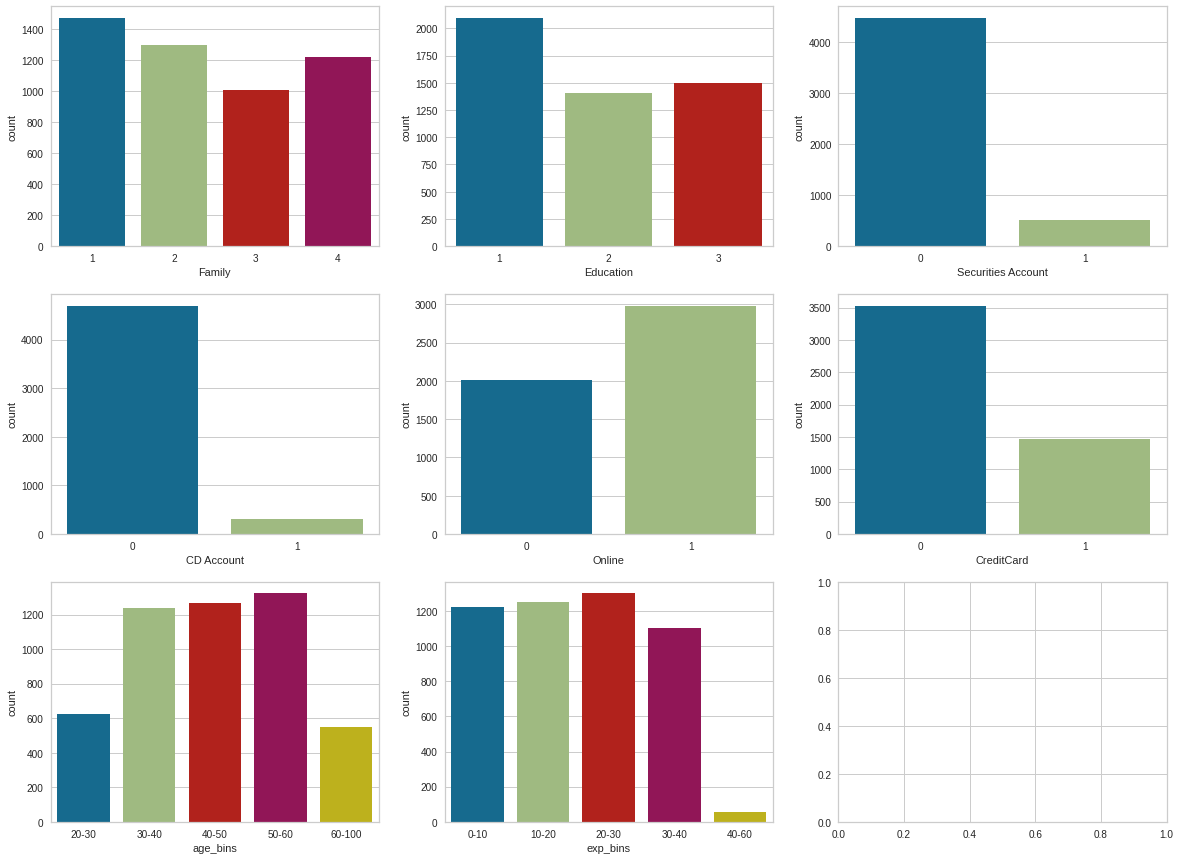

In [256]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for col, subplot in zip(categorical_cols, ax.flatten()):
    sns.countplot(x=col, data=data, ax=subplot)

### EDA 3
 - CD Account with value of 1 is having higher chance of getting personal loan. We can confirm it in the end with feature importance from the model

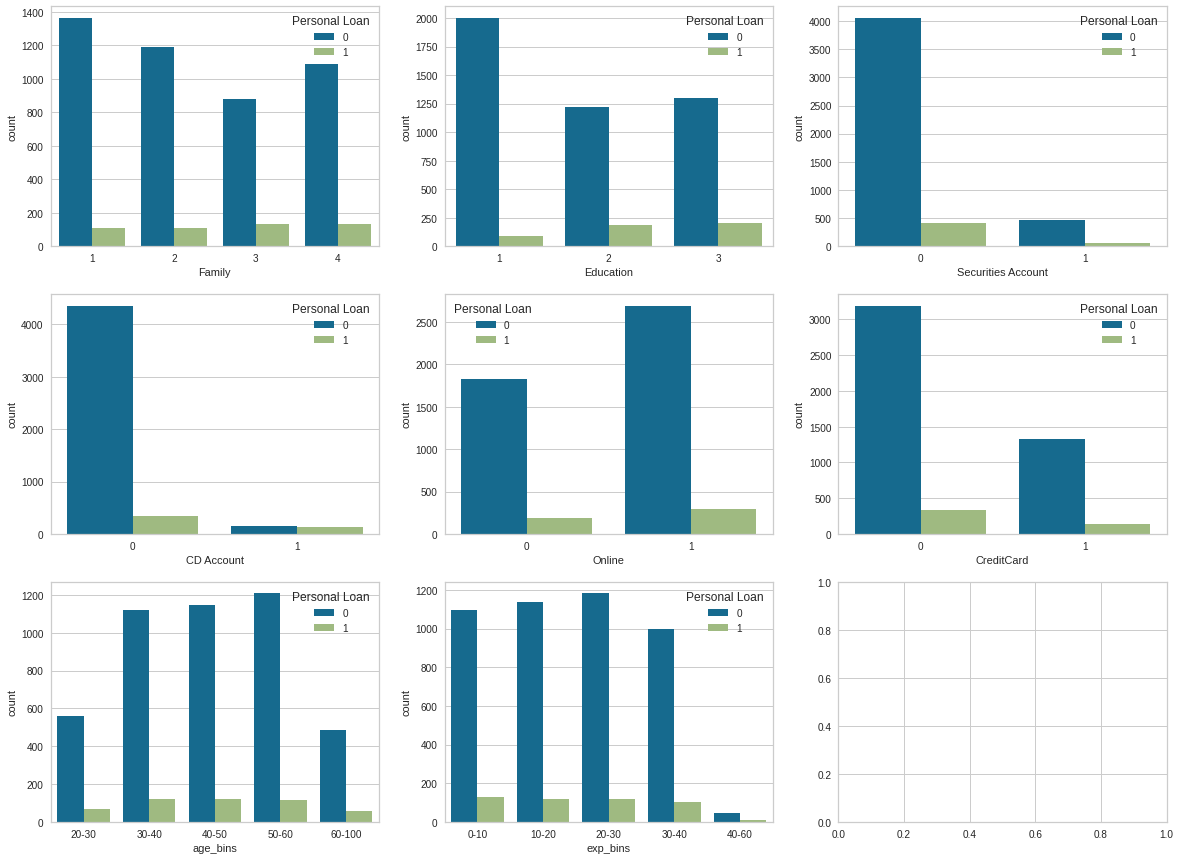

In [257]:
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
for col, subplot in zip(categorical_cols, ax.flatten()):
    sns.countplot(x=col, data=data, hue='Personal Loan', ax=subplot)

### EDA 3
 - Mortgage, Income and CCAvg is having high outliers and for our analysis we are applying standard scalar for Mortgage variable to reduce the effect of outliers

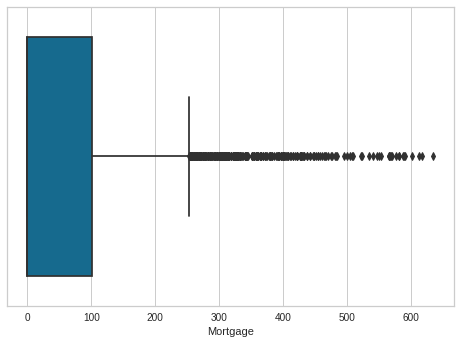

In [258]:
sns.boxplot(data['Mortgage'])
plt.show()

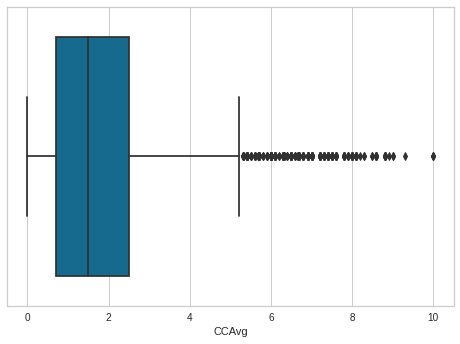

In [259]:
sns.boxplot(data['CCAvg'])
plt.show()

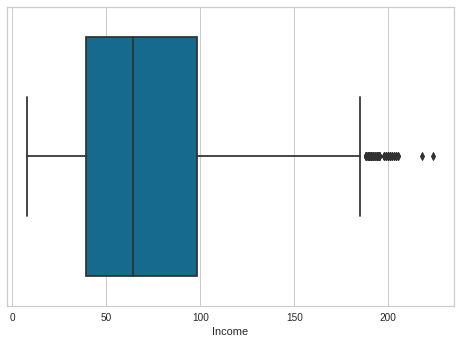

In [260]:
sns.boxplot(data['Income'])
plt.show()

In [281]:
base_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


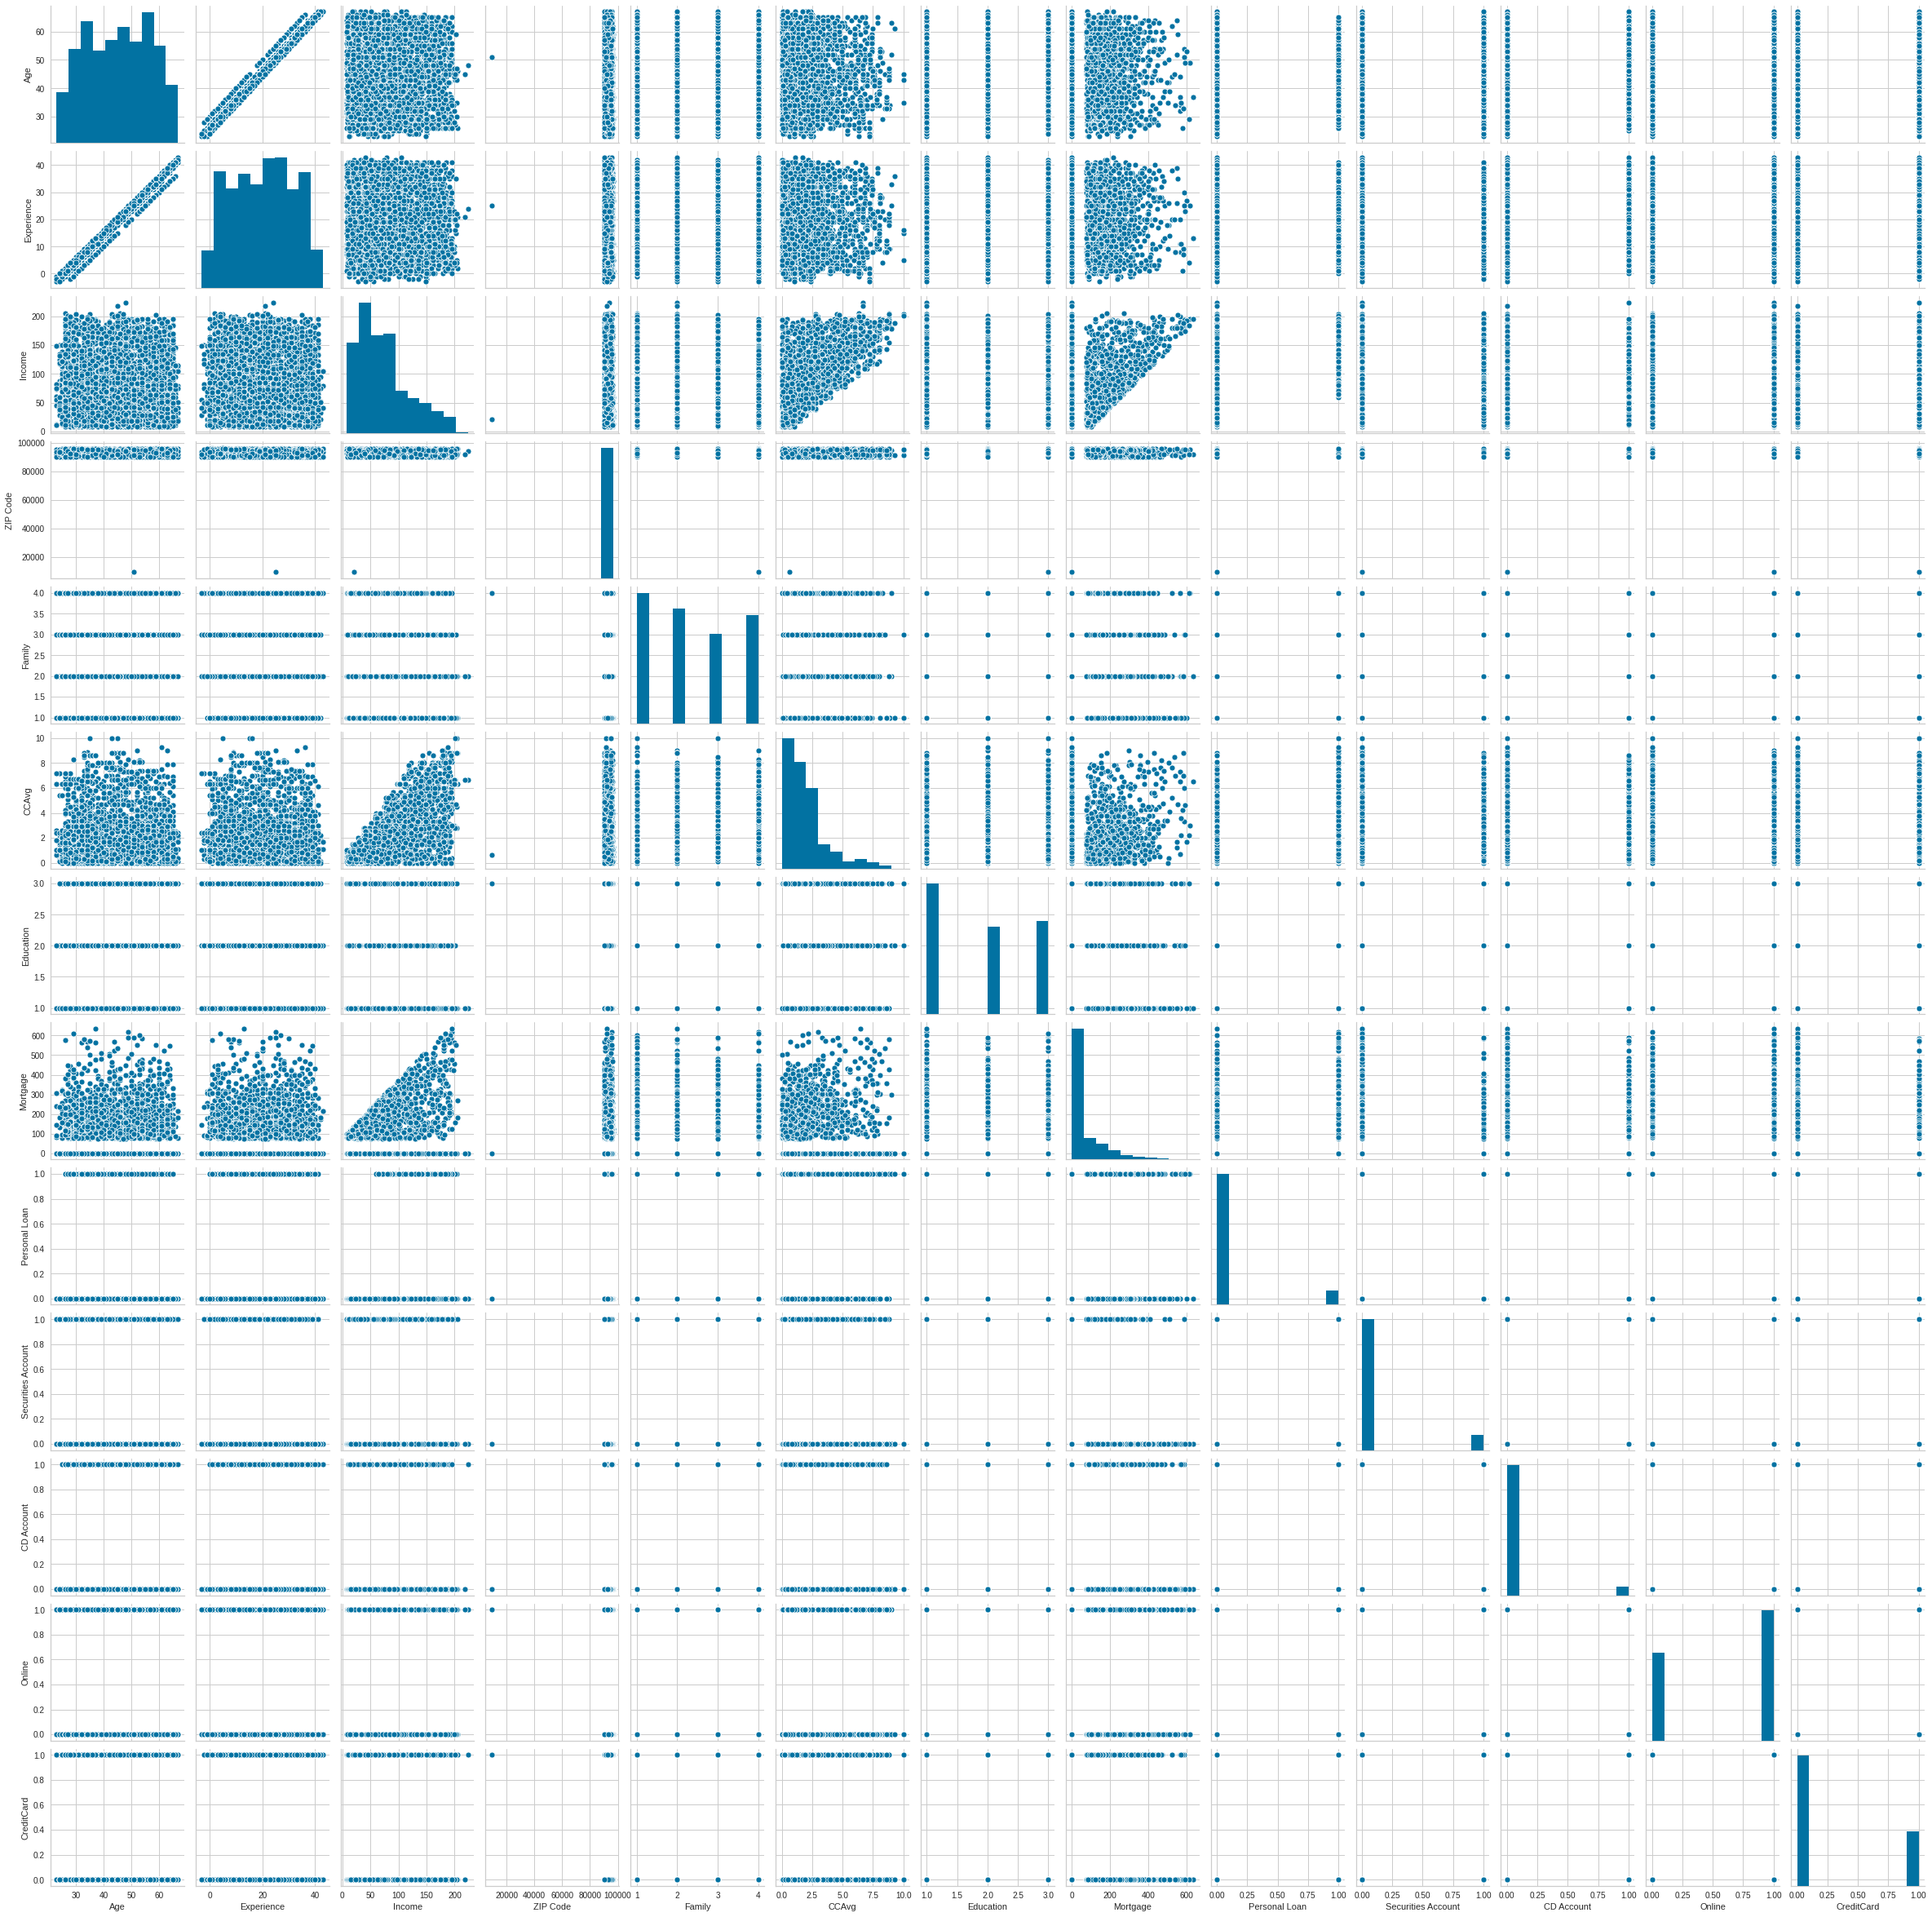

In [282]:
sns.pairplot(base_data.drop('ID',axis=1))

In [263]:
data_updated = pd.get_dummies(data,columns=categorical_cols,drop_first=True)

In [264]:
data_updated.drop(cols_to_drop, axis=1, inplace=True)

In [265]:
data_updated.head()

,ID,Income,CCAvg,Personal Loan,lat,lng,Mortgage_Scaled,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,age_bins_30-40,age_bins_40-50,age_bins_50-60,age_bins_60-100,exp_bins_10-20,exp_bins_20-30,exp_bins_30-40,exp_bins_40-60
0,1,49,1.6,0,34.2,-118,-0.555524,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,34,1.5,0,34.022,-118.286,-0.555524,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,3,11,1.0,0,37.87,-122.26,-0.555524,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,4,100,2.7,0,37.72,-122.44,-0.555524,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,45,1.0,0,34.243,-118.527,-0.555524,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0


Income and CCAvg looks like slightly correlated but removing one of them had high drop in metrics, so including it

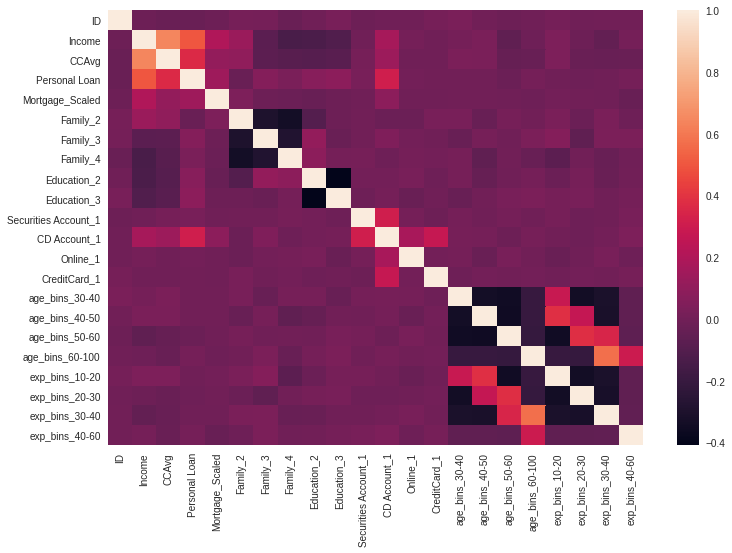

In [266]:
plt.figure(figsize=(12,8))
sns.heatmap(data_updated.corr())

In [267]:
### This specific project uses only Logistic regression and then using only the hyperparameter tuning for Logistic regression

def apply_parameter_tuning(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    C = np.logspace(-1, 4, num=10)
    penalty = ['l1', 'l2']
    solver = ['liblinear', 'saga']
    hyperparameters = dict(C=C, penalty=penalty, solver=solver, class_weight='balanced')
    logistic=LogisticRegression()
    randomSearch = RandomizedSearchCV(estimator=logistic, param_distributions=hyperparameters, cv=5, n_jobs=-1,random_state=102)
    best_model = randomSearch.fit(X_train,y_train)
    print(best_model.best_estimator_)
    return best_model.estimator

In [268]:
### Plotting the confusion matrix with predicted and actual value

def plot_cm(y_test,y_pred):
    cm=metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
    plt.figure(figsize = (20,6))
    sns.heatmap(df_cm, annot=True)
    

In [269]:
### Plotting the roc score, auc score 

def plot_roc_auc(y_test,y_pred,y_prob):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test,y_prob)
    print('AUC Value')
    auc_value = metrics.auc(fpr, tpr)
    print(auc_value)
    print('ROC Value')
    print(logit_roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [270]:
### Plotting the feature importances

def plot_feat_imp(coef, features):
    feature_importances = pd.DataFrame(abs(coef),
                                       index = features,
                                        columns=['importance']).sort_values('importance',ascending=False)
    plt.figure(figsize=(15,12))
    feature_importances.sort_values('importance',ascending=False,inplace=True)
    plt.tight_layout()
    feature_importances_updated = feature_importances.head(10)
    b= sns.barplot(x=feature_importances_updated.importance, y=feature_importances_updated.index)
    b.tick_params(labelsize=13)

In [283]:
def train_model(X, y, model, t=0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
#     y_pred=model.predict(X_test)
    y_prob = (model.predict_proba(X_test))[:,1]
    y_pred = [1 if y >= t else 0 for y in y_prob]
    print(classification_report(y_test,y_pred))
    print('Accuracy', metrics.accuracy_score(y_test,y_pred))
    plot_cm(y_test,y_pred)
    plot_roc_auc(y_test,y_pred,y_prob)
    plot_feat_imp(model.coef_[0],X_train.columns)

    

In [272]:
data_updated.head()

,ID,Income,CCAvg,Personal Loan,lat,lng,Mortgage_Scaled,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,age_bins_30-40,age_bins_40-50,age_bins_50-60,age_bins_60-100,exp_bins_10-20,exp_bins_20-30,exp_bins_30-40,exp_bins_40-60
0,1,49,1.6,0,34.2,-118,-0.555524,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2,34,1.5,0,34.022,-118.286,-0.555524,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,3,11,1.0,0,37.87,-122.26,-0.555524,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,4,100,2.7,0,37.72,-122.44,-0.555524,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,45,1.0,0,34.243,-118.527,-0.555524,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0


In [273]:
data_updated.isna().sum()

ID                      0  
Income                  0  
CCAvg                   0  
Personal Loan           0  
lat                     590
lng                     590
Mortgage_Scaled         0  
Family_2                0  
Family_3                0  
Family_4                0  
Education_2             0  
Education_3             0  
Securities Account_1    0  
CD Account_1            0  
Online_1                0  
CreditCard_1            0  
age_bins_30-40          0  
age_bins_40-50          0  
age_bins_50-60          0  
age_bins_60-100         0  
exp_bins_10-20          0  
exp_bins_20-30          0  
exp_bins_30-40          0  
exp_bins_40-60          0  
dtype: int64

In [274]:
data_updated.dropna(inplace=True)

### Model Development
 - Model1:
    - Baseline model from the actual data without any pre-processing
    - Its a nice way to understand whats your baseline model predicts and based on that we can take next steps
 - Model2:
    -  Logistic regression model without any hyperparameter optimization
    -  if your base model provides better result without hyperparameter optimization, its well and good and you can use it. Since it avoids utilizing huge compute power in the real world where you perform this hyperparameter optimization
 - Model3:
   - Logistic regression model with hyperparameter optimization


In this case there is no major difference between all the three models except for the feature importance. With data preprocessing, we are able to narrow down particular range in each feature which has high impact on a customer purchasing the personal loan


In [284]:
X = base_data.drop(['ID','Personal Loan','ZIP Code'], axis=1)
y= base_data['Personal Loan']

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.85      0.66      0.74       105

    accuracy                           0.95      1000
   macro avg       0.91      0.82      0.86      1000
weighted avg       0.95      0.95      0.95      1000

Accuracy 0.952
AUC Value
0.9652779994679436
ROC Value
0.8218675179569034


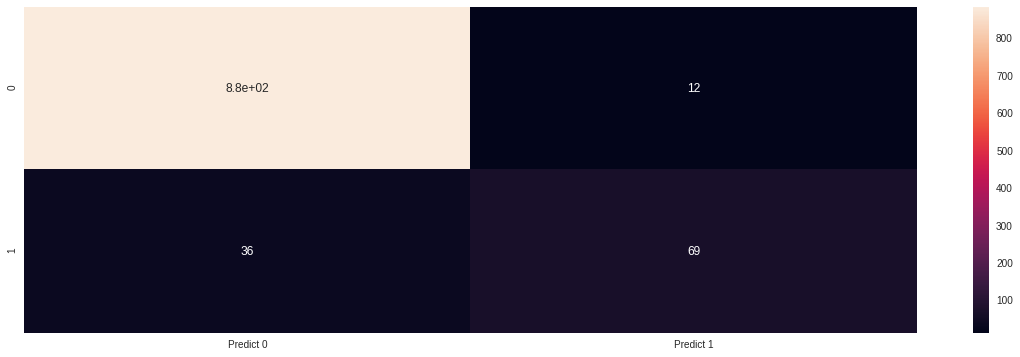

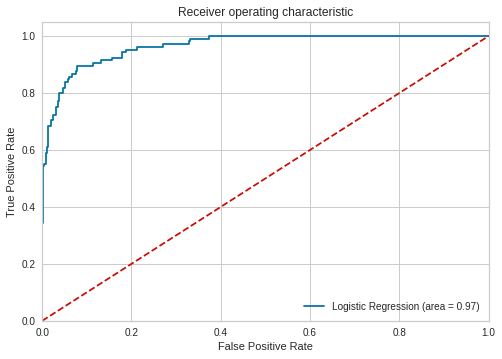

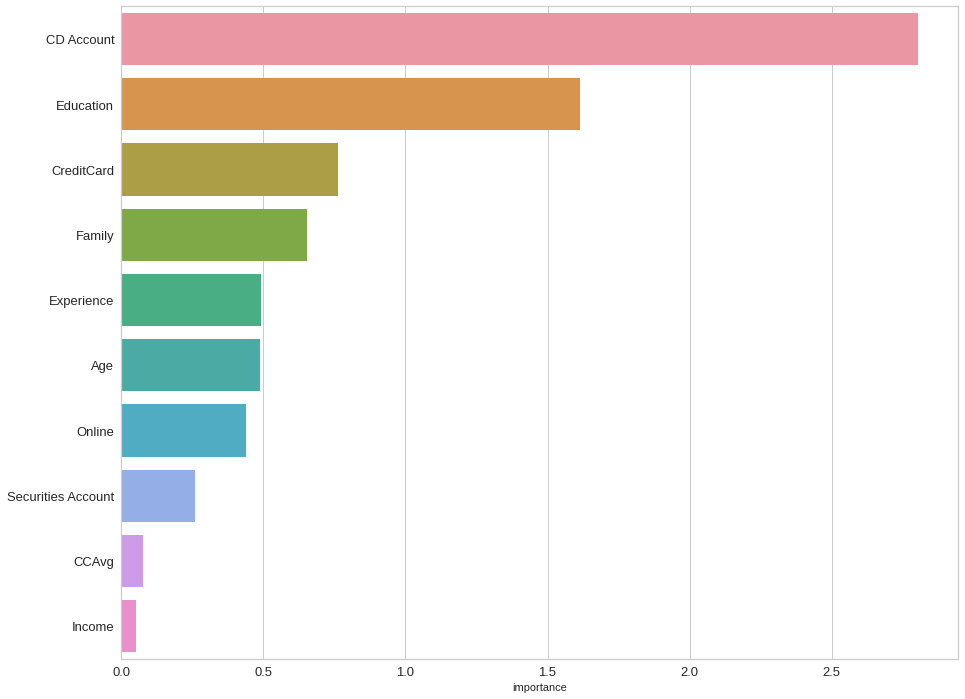

In [285]:
logistic = LogisticRegression()
train_model(X,y,logistic)

In [286]:
X = data_updated.drop(['ID','Personal Loan','lat','lng'], axis=1)
y= data_updated['Personal Loan']

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       801
           1       0.90      0.65      0.76        81

    accuracy                           0.96       882
   macro avg       0.93      0.82      0.87       882
weighted avg       0.96      0.96      0.96       882

Accuracy 0.9614512471655329
AUC Value
0.9726576347466901
ROC Value
0.8234151754751006


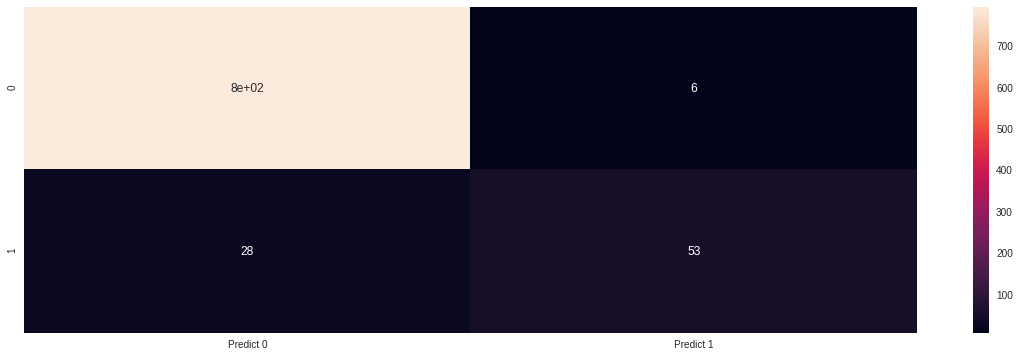

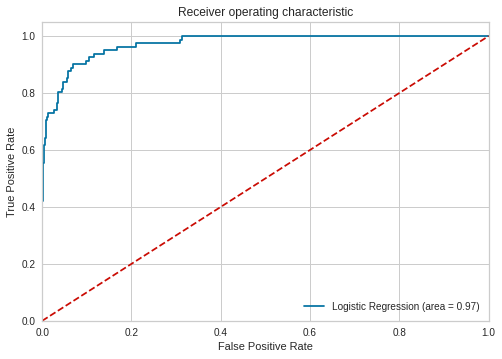

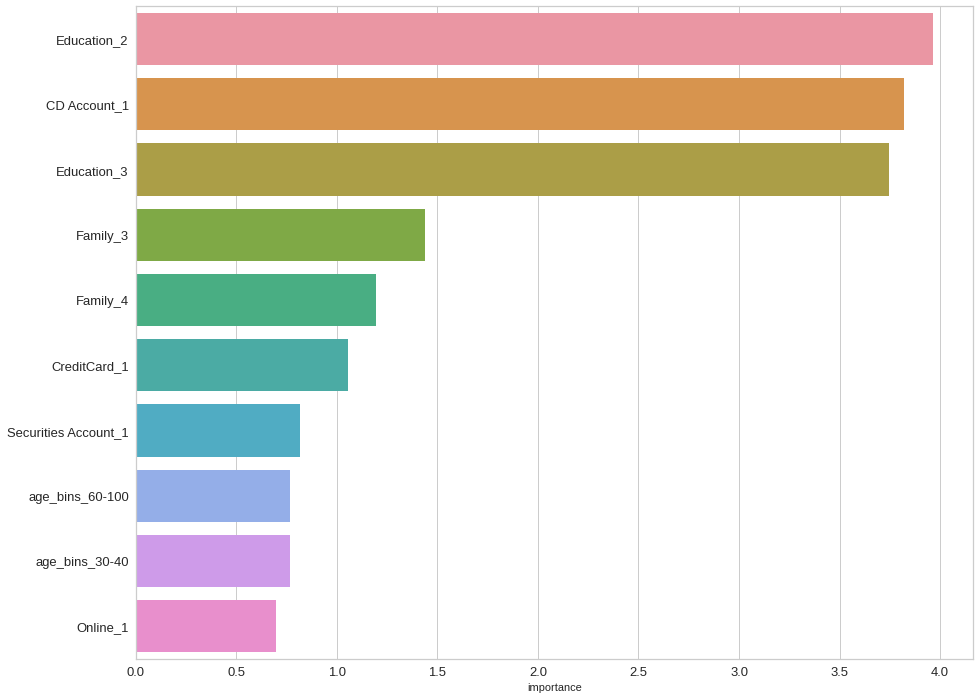

In [287]:
logistic = LogisticRegression()
train_model(X,y,logistic)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=215.44346900318845, class_weight='c', penalty='l1',
                   solver='saga')
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       801
           1       0.90      0.65      0.76        81

    accuracy                           0.96       882
   macro avg       0.93      0.82      0.87       882
weighted avg       0.96      0.96      0.96       882

Accuracy 0.9614512471655329
AUC Value
0.9726576347466901
ROC Value
0.8234151754751006


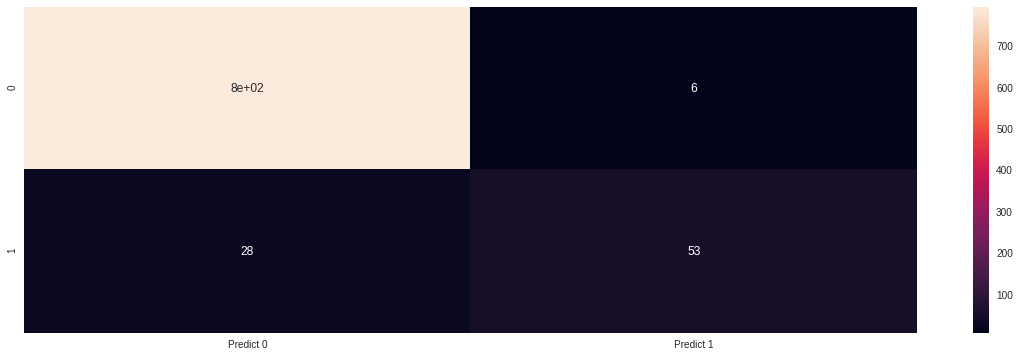

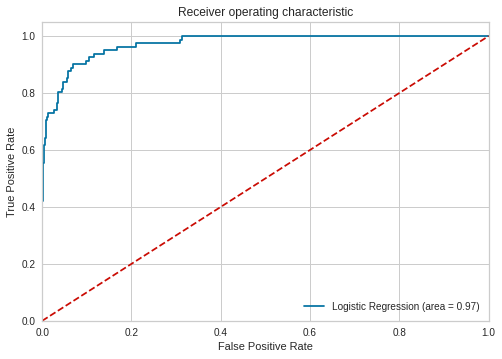

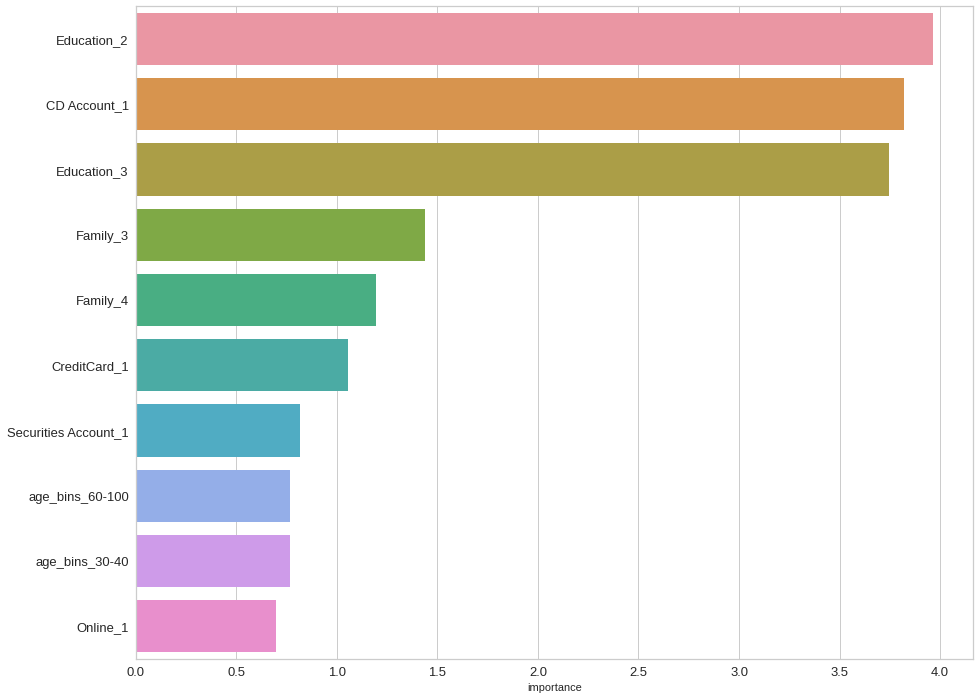

In [288]:
model = apply_parameter_tuning(X,y)
train_model(X,y,model)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.97      0.99      0.98       801
           1       0.84      0.73      0.78        81

    accuracy                           0.96       882
   macro avg       0.91      0.86      0.88       882
weighted avg       0.96      0.96      0.96       882

Accuracy 0.9625850340136054
AUC Value
0.9726576347466901
ROC Value
0.857331113885421


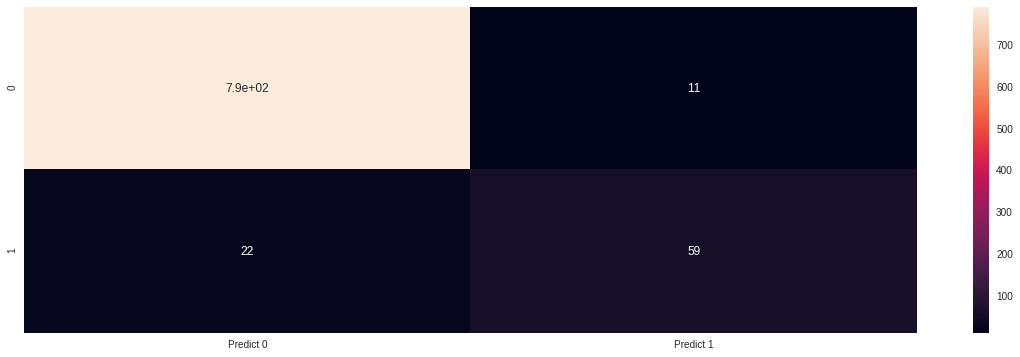

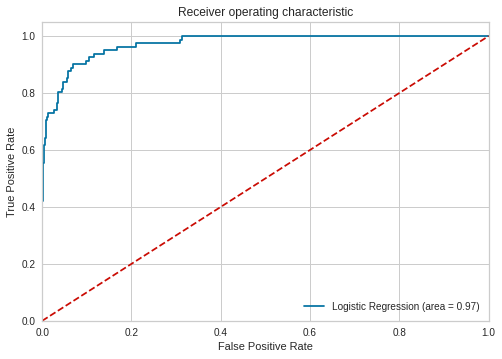

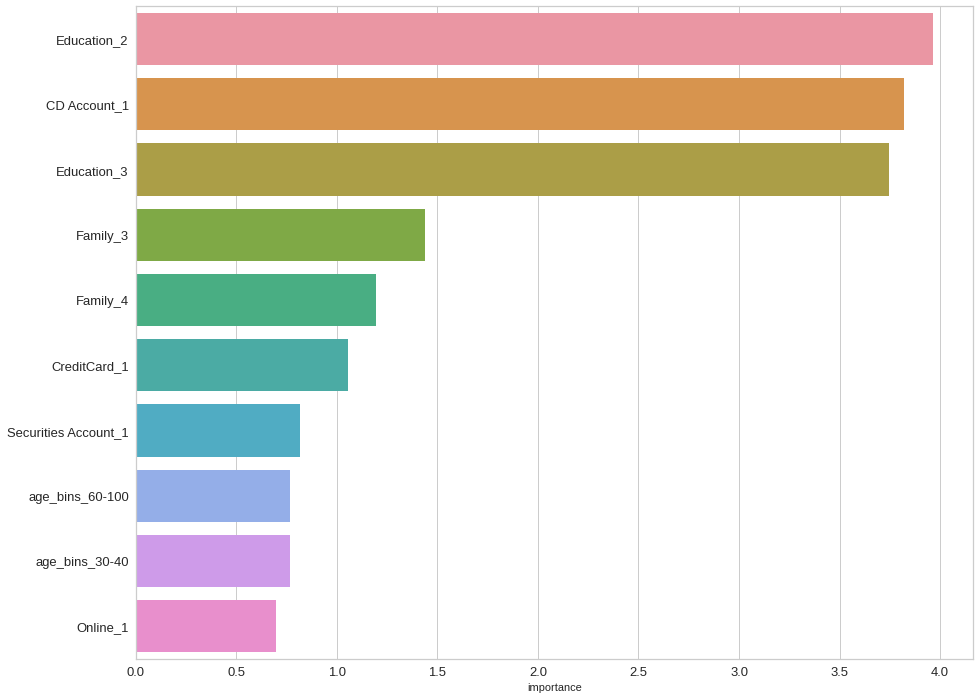

In [289]:
train_model(X,y,model,0.4)

### Conclusion :
 - Education 2,3 and CD Account with value 1 and a family with 3 or 4 members having higher chance of getting personal loans
 - Its intitutively easier to explain the business too that a family with more people and people with certain education are more prone to getting personal loans